# Logistic Regression 2

**=================================================================================================================**

## Project Description

In this module, we have used logistic regression with one and two predictors to develop a model to identify risky loans. You can use these templates to consider alternative combinations of variables, evaluating them in terms of the mean absolute error and using an ROC curve. You can also build a more general logistic regression tool that allows for more than 2 predictor variables.

Using the model for two predictor variables, evaluate different combinations of predictors to determine which set of two predictor variables does the best job of identifying risky loans. In discussing your results, be sure to discuss the combinations of predictor variables that you considered and how you determined which combination of predictor variables performed best. Those looking for an additional challenge can generalize the “LgstcReg 2 predictors” worksheet to allow for more predictor variables and assess if the addition of more predictor variables results in better performance.

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|annual_inc |The self-reported annual income provided by the borrower during registration, in $1000s	|
|application_type |Indicates whether the loan is an individual application or a joint application with two co-borrowers	|
|collections_12_mths_ex_med |Number of collections in 12 months excluding medical collections	|
|delinq_2yrs |The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years	|
|dti |A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.	|
|home_ownership |The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.	|
|inq_last_6mths |The number of inquiries in past 6 months (excluding auto and mortgage inquiries)	|
|loan_status |Current status of the loan	|
|open_acc |The number of open credit lines in the borrower's credit file.	|
|pub_rec |Number of derogatory public records	|
|term |	The number of payments on the loan. Values are in months and can be either 36 or 60. |
|verification_status |Indicates if income was verified by LC, not verified, or if the income source was verified	|

## Summary

## Recommendation for Action

**=================================================================================================================**

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify


import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols


import datetime
from datetime import datetime, timedelta, date


import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures

from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.feature_selection import f_regression, f_classif, chi2, RFE, RFECV
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.feature_selection import VarianceThreshold, GenericUnivariateSelect
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB

import imblearn

from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek


import feature_engine

from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures 
from feature_engine.selection import DropCorrelatedFeatures, SmartCorrelatedSelection
from feature_engine.selection import SelectBySingleFeaturePerformance

import pycaret
from pycaret.classification import *

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# This module lets us save our models once we fit them.
# import pickle

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Quick Data Glance

In [2]:
df = pd.read_csv("calibdata2.csv")

In [3]:
df.head()

,annualinc,collections,delinq,inq,openacc,dti,pubrec,individual,mortgage,rent,own,other,term60mths,vstatusverified,vstatusnotverified,lstatus
0,0.02,0.00,0.00,0.06,0.47,0.59,0.00,1,1,0,0,0,1,1,0,0
1,0.00,0.00,0.00,0.00,0.12,0.57,0.00,1,0,1,0,0,0,0,1,0
2,0.01,0.00,0.00,0.03,0.16,0.34,0.00,1,0,1,0,0,0,1,0,0
3,0.00,0.00,0.00,0.00,0.18,0.21,0.00,1,1,0,0,0,0,0,1,0
4,0.01,0.00,0.00,0.00,0.30,0.59,0.00,1,0,1,0,0,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49986 entries, 0 to 49985
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   annualinc           49986 non-null  float64
 1   collections         49986 non-null  float64
 2   delinq              49986 non-null  float64
 3   inq                 49986 non-null  float64
 4   openacc             49986 non-null  float64
 5   dti                 49986 non-null  float64
 6   pubrec              49986 non-null  float64
 7   individual          49986 non-null  int64  
 8   mortgage            49986 non-null  int64  
 9   rent                49986 non-null  int64  
 10  own                 49986 non-null  int64  
 11  other               49986 non-null  int64  
 12  term60mths          49986 non-null  int64  
 13  vstatusverified     49986 non-null  int64  
 14  vstatusnotverified  49986 non-null  int64  
 15  lstatus             49986 non-null  int64  
dtypes: f

In [5]:
df.dtypes.value_counts()

int64      9
float64    7
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df.describe(include="all")

,annualinc,collections,delinq,inq,openacc,dti,pubrec,individual,mortgage,rent,own,other,term60mths,vstatusverified,vstatusnotverified,lstatus
count,49986.00,49986.00,49986.00,49986.00,49986.00,49986.00,49986.00,49986.00,49986.00,49986.00,49986.00,49986.00,49986.00,49986.00,49986.00,49986.00
mean,0.01,0.00,0.01,0.02,0.19,0.45,0.00,1.00,0.50,0.40,0.10,0.00,0.30,0.38,0.32,0.07
std,0.01,0.03,0.03,0.03,0.09,0.21,0.01,0.02,0.50,0.49,0.29,0.01,0.46,0.48,0.46,0.25
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.12,0.30,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.01,0.00,0.00,0.00,0.18,0.44,0.00,1.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.01,0.00,0.00,0.03,0.23,0.59,0.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [7]:
df.lstatus.value_counts(normalize=True)

0   0.93
1   0.07
Name: lstatus, dtype: float64

In [8]:
df.shape

(49986, 16)

In [9]:
df.columns

Index(['annualinc', 'collections', 'delinq', 'inq', 'openacc', 'dti', 'pubrec', 'individual', 'mortgage', 'rent', 'own', 'other', 'term60mths', 'vstatusverified', 'vstatusnotverified', 'lstatus'], dtype='object')

**==================================================================================================================**

## Create a small dataset

In [10]:
df = df.sample(frac=0.25)

In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
df.head()

,annualinc,collections,delinq,inq,openacc,dti,pubrec,individual,mortgage,rent,own,other,term60mths,vstatusverified,vstatusnotverified,lstatus
0,0.01,0.00,0.00,0.00,0.11,0.42,0.00,1,1,0,0,0,0,0,0,0
1,0.01,0.00,0.00,0.03,0.19,0.40,0.00,1,0,1,0,0,0,0,1,0
2,0.01,0.00,0.00,0.00,0.19,0.51,0.00,1,0,1,0,0,0,0,1,0
3,0.01,0.00,0.00,0.00,0.12,0.44,0.00,1,1,0,0,0,0,0,0,0
4,0.01,0.00,0.00,0.03,0.16,0.30,0.00,1,0,1,0,0,1,1,0,0


In [13]:
df.shape

(12496, 16)

In [14]:
df.lstatus.value_counts(normalize=True)

0   0.93
1   0.07
Name: lstatus, dtype: float64

**==================================================================================================================**

**==================================================================================================================**

## Train Test Split

We've prepared our data and we're ready to model. There's one last step before we can begin. We must split the data into features and target variable, and into training data and test data. We do this using the `train_test_split()` function. We'll put 25% of the data into our test set, and use the remaining 75% to train the model.

Notice below that we include the argument `stratify=y`. If our master data has a class split of 80/20, stratifying ensures that this proportion is maintained in both the training and test data. `=y` tells the function that it should use the class ratio found in the `y` variable (our target).

The less data you have overall, and the greater your class imbalance, the more important it is to stratify when you split the data. If we didn’t stratify, then the function would split the data randomly, and we could get an unlucky split that doesn’t get any of the minority class in the test data, which means we wouldn’t be able to effectively evaluate our model. Worst of all, we might not even realize what went wrong without doing some detective work.

Lastly, we set a random seed so we and others can reproduce our work.



In [15]:
df.shape

(12496, 16)

In [16]:
X = df.iloc[:,0:15]
y = df.iloc[:,15]

In [18]:
X.values, y.values

(array([[0.00533527, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.00751789, 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        [0.00897296, 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        ...,
        [0.01091306, 0.        , 0.        , ..., 1.        , 1.        ,
         0.        ],
        [0.01321693, 0.        , 0.        , ..., 0.        , 1.        ,
         0.        ],
        [0.0077604 , 0.        , 0.03703704, ..., 1.        , 0.        ,
         0.        ]]),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9996, 15), (2500, 15), (9996,), (2500,))

**==================================================================================================================**

# Filter Methods (Other Methods)

## Univariate Performance with Feature-engine

This procedure works as follows:

- Train a ML model per every single feature
- Determine the performance of the models
- Select features if model performance is above a certain threshold

The C value in Logistic Regression is an user adjustable parameter that controls regularisation. In simple terms, higher values of C will instruct our model to fit the training set as best as possible, while lower C values will favour a simple models with coefficients closer to zero.


In [21]:
# set up the machine learning model
lr = LogisticRegression(penalty='l2', C=1000, random_state=0, solver='lbfgs', max_iter=1000)

In [22]:
# set up the selector
sel = SelectBySingleFeaturePerformance(
    variables=None,
    estimator=lr,
    scoring="roc_auc",
    cv=5,
    threshold=0.55
)

In [23]:
# find predictive features
sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(cv=5,
                                 estimator=LogisticRegression(C=1000,
                                                              max_iter=1000,
                                                              random_state=0),
                                 threshold=0.55)

In [24]:
# the transformer stores a dictionary of feature:metric pairs
# notice that the roc can be positive or negative.
# the selector selects based on the absolute value

#In general, an AUC of 0.5 suggests no discrimination 
#(i.e., ability to diagnose patients with and without the disease or condition based on the test), 
#0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding

sel.feature_performance_

{'annualinc': 0.576822940313442,
 'collections': 0.49705241816274925,
 'delinq': 0.5073993420109036,
 'inq': 0.580084731536066,
 'openacc': 0.5099585489358384,
 'dti': 0.5278410033828458,
 'pubrec': 0.5107032941114253,
 'individual': 0.5004841312533621,
 'mortgage': 0.5309005216118967,
 'rent': 0.529171428991361,
 'own': 0.4982371998978737,
 'other': 0.5,
 'term60mths': 0.5346063947286774,
 'vstatusverified': 0.5292979290195733,
 'vstatusnotverified': 0.5090316226777127}

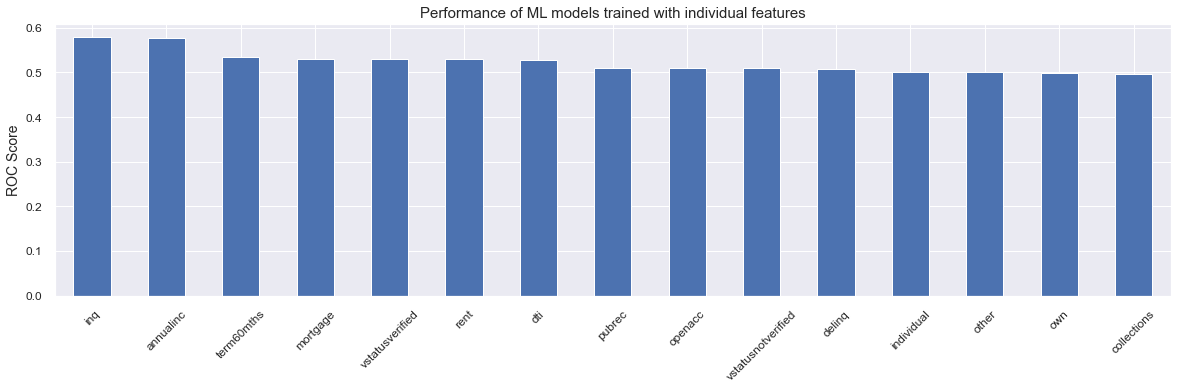

In [25]:
pd.Series(sel.feature_performance_).sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title('Performance of ML models trained with individual features', size=15)
plt.xticks(rotation=45)
plt.ylabel('ROC Score')
plt.show()

In [26]:
# the features that will be removed

sel.features_to_drop_

['collections',
 'delinq',
 'openacc',
 'dti',
 'pubrec',
 'individual',
 'mortgage',
 'rent',
 'own',
 'other',
 'term60mths',
 'vstatusverified',
 'vstatusnotverified']

In [27]:
# select features in the dataframes

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [28]:
X_train.shape, X_test.shape

((9996, 2), (2500, 2))

In [29]:
X_train.columns

Index(['annualinc', 'inq'], dtype='object')

**==================================================================================================================**

**Comment: Only Annual Income and Inquiry gives the best ROC-AUC scores.**

**=================================================================================================================**

# Class Imbalance Treatment

For many machine learning tasks on imbalanced datasets, like this credit card fraud detection, we normally care more about recall than precision. As a baseline, we want the model to be able to find all frauds and we would allow the model to make false-positive errors because the cost of false positives is usually not very high (maybe just costs a false notification email or phone call to confirm with customers). On the other hand, failing to recognize positive examples (such as fraud or a deadly disease) can be life-threatening 

As such, our priority is to improve the model's recall, then we will also want to keep precision as high as possible.

## Class reweighting

For binary classification models, its loss function is normally calculated via a sum of the loss with respect to class 0 and the loss with respect to class 1. By default, their class weights are all 1s meaning we treat each class equally important.

However, since the class distribution is skewed in imbalanced datasets and the loss function optimization process will be dominated by the majority class, we want to help the minority class by increasing its class weight in the loss function.

Class weights can be generally calculated via the following three strategies:

- Based on their instances portion in the dataset. For example, if positive instances only take 10% of the dataset, we assign its weight to be 0.9 and weight for the majority class to be 0.1
- Heuristics or domain knowledge. Misclassification normally has different costs per class, for example, the cost of failure to diagnose a disease is much higher than a false positive diagnose. If we already know such misclassification costs beforehand, we may use them to assign class weights
- Hyper-parameter tuning. Standard hyper-parameter tuning methods can be used to find optimized class weights. For example, grid searching from 0.1 to 0.9 for positive class weight to find out which hyperparameter combination generates the best model.


In [30]:
class_weight = {}

# Assign weight of class 0 to be 0.1
class_weight[0] = 0.1

# Assign weight of class 1 to be 0.9
class_weight[1] = 0.9

In [31]:
# Define a logistic regression with weight
logregw = LogisticRegression(random_state=0, 
                              max_iter = 1000,
                              class_weight=class_weight,
                              C=1.0)

In [32]:
# Train the model
logregw.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9}, max_iter=1000, random_state=0)

In [33]:
# Make predictions on the test dataset
logregw_pred = logregw.predict(X_test)

In [34]:
logregw_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
print("Accuracy:", "%.3f" % accuracy_score(y_test, logregw_pred))
print("Precision:", "%.3f" % precision_score(y_test, logregw_pred))
print("Recall:", "%.3f" % recall_score(y_test, logregw_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, logregw_pred))
print("ROC-AUC Score:", "%.3f" % roc_auc_score(y_test, logregw_pred))

Accuracy: 0.930
Precision: 0.333
Recall: 0.006
F1 Score: 0.011
ROC-AUC Score: 0.502


## Logistic Regression (Scikit Learn)

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

Let's build our model using **LogisticRegression** from the Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in the internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models.
**C** parameter indicates **inverse of regularization strength** which must be a positive float. Smaller values specify stronger regularization.

# Hyperparameter Tuning

## RandomSearchCV

Randomised grid search is very useful in finding near-optimal hyper parameters for any machine learning models.

Rules of thumb: with 60 iterations, 95% of the time, best 5% sets of parameters can be found, regardless of grid size.

In [36]:
logreg = LogisticRegression(max_iter=1000, random_state=0)

In [37]:
parameters = { 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
               'C':  [0.001, 0.01, 0.1, 1, 10, 100, 1000]
             }

In [38]:
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [39]:
lr_randm = RandomizedSearchCV(estimator=logreg, param_distributions = parameters, cv = 5, n_iter = 60, 
                           n_jobs=-1, scoring=scoring, refit='roc_auc')

In [41]:
%%time
lr_randm.fit(X_train, y_train)

CPU times: total: 562 ms
Wall time: 13.5 s


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000, random_state=0),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   refit='roc_auc',
                   scoring={'recall', 'f1', 'roc_auc', 'precision', 'accuracy'})

In [42]:
lr_randm.best_estimator_

LogisticRegression(C=0.1, max_iter=1000, penalty='none', random_state=0,
                   solver='newton-cg')

In [43]:
lr_randm.best_score_

0.6114178989168815

In [44]:
lr_randm.best_params_

{'solver': 'newton-cg', 'penalty': 'none', 'C': 0.1}

In [45]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {
                 'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 'roc_auc' : 'mean_test_roc_auc'
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    roc_auc = best_estimator_results.mean_test_roc_auc
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        'ROC-AUC' : roc_auc
                        },
                        ignore_index=True
                       )
  
    return table

In [46]:
# Get all CV scores
lr_cv_results = make_results('Logistic Regression', lr_randm, 'roc_auc')
lr_cv_results

,Model,Precision,Recall,F1,Accuracy,ROC-AUC
0,Logistic Regression,0.00,0.00,0.00,0.93,0.61


### Logistic Regression model

In [47]:
logreg = LogisticRegression(penalty='none', C=0.1, max_iter=1000, random_state=0, solver='newton-cg')

In [48]:
logreg.fit(X_train,y_train)

LogisticRegression(C=0.1, max_iter=1000, penalty='none', random_state=0,
                   solver='newton-cg')

In [49]:
logreg_pred = logreg.predict(X_test)

In [50]:
logreg_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [51]:
logreg.coef_

array([[-54.19580199,   9.80129455]])

In [52]:
logreg.intercept_

array([-2.40300944])

In [53]:
logreg.score(X_train, y_train)

0.9297719087635054

In [54]:
logreg.score(X_test, y_test)

0.9304

### Logistic Model Evaluation

In [55]:
print(classification_report(y_test,logreg_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2325
           1       1.00      0.01      0.01       175

    accuracy                           0.93      2500
   macro avg       0.97      0.50      0.49      2500
weighted avg       0.94      0.93      0.90      2500



In [56]:
cm = confusion_matrix(y_test,logreg_pred)
cm

array([[2325,    0],
       [ 174,    1]], dtype=int64)

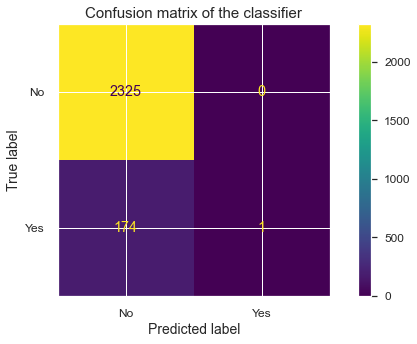

In [57]:
fig, ax = plt.subplots(figsize=(10,5))

ConfusionMatrixDisplay.from_estimator(estimator=logreg, X=X_test, y=y_test, ax=ax, display_labels=["No","Yes"])
ax.set_title('Confusion matrix of the classifier', size=15)

plt.show()

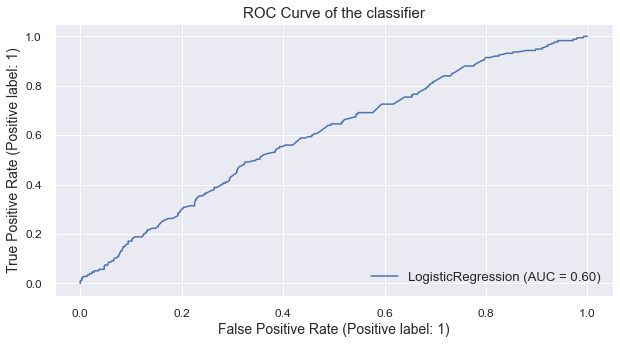

In [58]:
fig, ax = plt.subplots(figsize=(10,5))

RocCurveDisplay.from_estimator(estimator=logreg, X=X_test, y=y_test, ax=ax)
ax.set_title('ROC Curve of the classifier', size=15)

plt.show()

### Estimate the generalization error of a machine learning model using Cross-Validation Schemes

In [59]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [60]:
# estimate generalization error
clf = cross_validate(estimator=logreg,
                    X=X_train,
                    y=y_train,
                    scoring='roc_auc',
                    return_train_score=True,
                    cv=kf)

In [61]:
# mean test set roc-auc
clf["test_score"].mean()

0.6120423663778402

In [62]:
# mean train set roc-auc
clf["train_score"].mean()

0.61249080878061

In [64]:
lrtable = pd.DataFrame()
lrtable = lrtable.append({'Model': "Logistic Regression",
                        'F1':  f1_score(y_test, logreg_pred),
                        'Recall': recall_score(y_test, logreg_pred),
                        'Precision': precision_score(y_test, logreg_pred),
                        'Accuracy': accuracy_score(y_test, logreg_pred),
                        'ROC-AUC': roc_auc_score(y_test, logreg_pred)
                      },
                        ignore_index=True)
                     
lrtable

,Model,F1,Recall,Precision,Accuracy,ROC-AUC
0,Logistic Regression,0.01,0.01,1.00,0.93,0.50


**==================================================================================================================**

**=================================================================================================================**

#### Python code done by Dennis Lam